<a href="https://colab.research.google.com/github/Martishamao/Sales_predictions/blob/main/Sales_Prediction_v4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Project 1 - Part 4 (Core)
- Martisha Owens
- 9/8/2022



In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

filename = '/content/drive/MyDrive/Coding Dojo/01 Python/sales_predictions.csv'
df = pd.read_csv(filename)
df.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


# **Part 2 Core**

In [3]:
# 1) How many rows and columns?
df.shape

(8523, 12)

> The Data has 8523 rows and 12 columns.

In [4]:
df.nunique()

Item_Identifier              1559
Item_Weight                   415
Item_Fat_Content                5
Item_Visibility              7880
Item_Type                      16
Item_MRP                     5938
Outlet_Identifier              10
Outlet_Establishment_Year       9
Outlet_Size                     3
Outlet_Location_Type            3
Outlet_Type                     4
Item_Outlet_Sales            3493
dtype: int64

In [5]:
# 2) What are the datatypes of each variable?
df.dtypes

Item_Identifier               object
Item_Weight                  float64
Item_Fat_Content              object
Item_Visibility              float64
Item_Type                     object
Item_MRP                     float64
Outlet_Identifier             object
Outlet_Establishment_Year      int64
Outlet_Size                   object
Outlet_Location_Type          object
Outlet_Type                   object
Item_Outlet_Sales            float64
dtype: object

In [6]:
# 3) Are there duplicates? If so, drop any duplicates.
df.duplicated().sum()

0

> This shows that there are no duplicated data.


In [7]:
# 4) Identify missing values.
df.isna().sum()

Item_Identifier                 0
Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

> Item_Weight has 1463 missing data while Outlet_Size has 2410 missing data.

In [8]:
#Seeing if any grouping assumptions could be made for the missing Outlet_Size data.
df[df['Outlet_Size'].isna()].groupby(['Outlet_Type','Outlet_Location_Type'])['Outlet_Location_Type'].count()

Outlet_Type        Outlet_Location_Type
Grocery Store      Tier 3                   555
Supermarket Type1  Tier 2                  1855
Name: Outlet_Location_Type, dtype: int64

> Of the 2410 missing data for Outlet_Size, 555 are Grocery Store, Tier 3 and 1855 are Supermarket Type 1, Tier 2.

In [9]:
#Observing the groupings for the Outlet_Size data.
df.groupby(['Outlet_Type','Outlet_Location_Type'])['Outlet_Size'].unique()

Outlet_Type        Outlet_Location_Type
Grocery Store      Tier 1                          [Small]
                   Tier 3                            [nan]
Supermarket Type1  Tier 1                  [Medium, Small]
                   Tier 2                     [nan, Small]
                   Tier 3                           [High]
Supermarket Type2  Tier 3                         [Medium]
Supermarket Type3  Tier 3                         [Medium]
Name: Outlet_Size, dtype: object

> Grocery Store only has Outlet_Size data for Tier 1 which is small. Using assumption, Grocery Store, Tier 3 would be Medium or Large.
>For Supermarket Type1, Tier 2, the Outlet_Size is Small. The missing data can be replaced with Small.

In [10]:
# 5) Decide on how to address the missing values and do it! (This requires your judgement, so explain your choice).
df['Item_Weight'].fillna(df['Item_Weight'].mean(),inplace=True)

> Item_Weight is numerical, thus the mean will be used to replace the missing data.


In [11]:
# Using the assumptions from #4, Setting the Grocery Store, Tier 3 and Supermarket Type1, Tier 2 null items
df['Outlet_Size'].loc[(df['Outlet_Size'].isna())& (df['Outlet_Type'] =='Grocery Store') &(df['Outlet_Location_Type']=='Tier 3')] = 'Large'
df['Outlet_Size'].loc[(df['Outlet_Size'].isna())& (df['Outlet_Type'] =='Supermarket Type1') &(df['Outlet_Location_Type']=='Tier 2')] = 'Small'

/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:1732: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)


In [12]:
# 6) Confirm that there are no missing values after addressing them.
df.isna().sum()

Item_Identifier              0
Item_Weight                  0
Item_Fat_Content             0
Item_Visibility              0
Item_Type                    0
Item_MRP                     0
Outlet_Identifier            0
Outlet_Establishment_Year    0
Outlet_Size                  0
Outlet_Location_Type         0
Outlet_Type                  0
Item_Outlet_Sales            0
dtype: int64

In [28]:
# 7) Find and fix any inconsistent categories of data (example: fix cat, Cat, and cats so that they are consistent) 
dtypes = df.dtypes
df_obj = dtypes[dtypes=='object'].index
for i in df_obj:
  print(i)
  print(df[i].value_counts(dropna=False))
  print('\n\n')

Item_Identifier
FDW13    10
FDG33    10
NCY18     9
FDD38     9
DRE49     9
         ..
FDY43     1
FDQ60     1
FDO33     1
DRF48     1
FDC23     1
Name: Item_Identifier, Length: 1559, dtype: int64



Item_Fat_Content
Low Fat    5517
Regular    3006
Name: Item_Fat_Content, dtype: int64



Item_Type
Fruits and Vegetables    1232
Snack Foods              1200
Household                 910
Frozen Foods              856
Dairy                     682
Canned                    649
Baking Goods              648
Health and Hygiene        520
Soft Drinks               445
Meat                      425
Breads                    251
Hard Drinks               214
Others                    169
Starchy Foods             148
Breakfast                 110
Seafood                    64
Name: Item_Type, dtype: int64



Outlet_Identifier
OUT027    935
OUT013    932
OUT049    930
OUT046    930
OUT035    930
OUT045    929
OUT018    928
OUT017    926
OUT010    555
OUT019    528
Name: Outlet_Identifier, dtyp

Listed are the category and items that needs to be fixed.
- Item_Fat_Content = ['Low Fat' 'Regular' 'low fat' 'LF' 'reg']
- Outlet_Size = ['Medium' 'Large' 'High' 'Small']

In [15]:
df['Item_Fat_Content'].replace(['low fat', 'LF', 'reg'], ['Low Fat', 'Low Fat','Regular'], inplace = True)
df['Outlet_Size'].replace('High', 'Large', inplace = True)
print(df['Item_Fat_Content'].unique())
print(df['Outlet_Size'].unique())

['Low Fat' 'Regular']
['Medium' 'Large' 'Small']


In [30]:
# 8) For any numerical columns, obtain the summary statistics of each (min, max, mean)
df.describe(include=[np.number])

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
count,8523.000000,8523.000000,8523.000000,8523.000000,8523.000000
mean,12.857645,0.066132,140.992782,1997.831867,2181.288914
std,4.226124,0.051598,62.275067,8.371760,1706.499616
min,4.555000,0.000000,31.290000,1985.000000,33.290000
25%,9.310000,0.026989,93.826500,1987.000000,834.247400
50%,12.857645,0.053931,143.012800,1999.000000,1794.331000
75%,16.000000,0.094585,185.643700,2004.000000,3101.296400
max,21.350000,0.328391,266.888400,2009.000000,13086.964800


# **Part 3 Core**

In [17]:
df.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,Large,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,Large,Tier 3,Supermarket Type1,994.7052


##Histogram


---

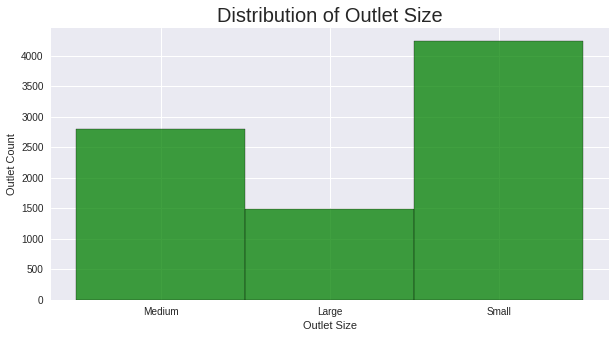

In [62]:
fig, ax = plt.subplots(ncols=1, figsize=(10,5))

ax = sns.histplot(data=df, x='Outlet_Size', color='green')
ax.set_title('Distribution of Outlet Size', fontsize = 20)
ax.set_xlabel('Outlet Size')
ax.set_ylabel('Outlet Count');

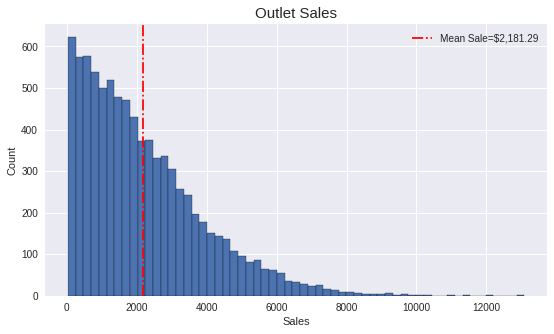

In [67]:
fig, ax = plt.subplots(ncols=1, figsize=(9,5))
ax = df['Item_Outlet_Sales'].hist(edgecolor = 'black', bins = 'auto')

plt.ylabel('Count')
plt.xlabel('Sales')
plt.title('Outlet Sales',fontsize = 15)

mean = df['Item_Outlet_Sales'].mean()
ax.axvline(mean, color = 'red', linestyle = '-.', label=f"Mean Sale=${mean:,.2f}")
ax.legend()

plt.style.use('seaborn');

##Boxplot


---

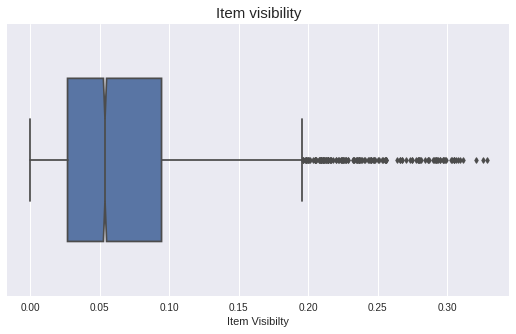

In [70]:
fig, ax = plt.subplots(ncols=1, figsize=(9,5))

sns.boxplot(data=df, x = 'Item_Visibility', notch = True, fliersize = 4, width = .6)
plt.xlabel('Item Visibilty')
plt.title('Item visibility',fontsize = 15);

##Heatmap
---

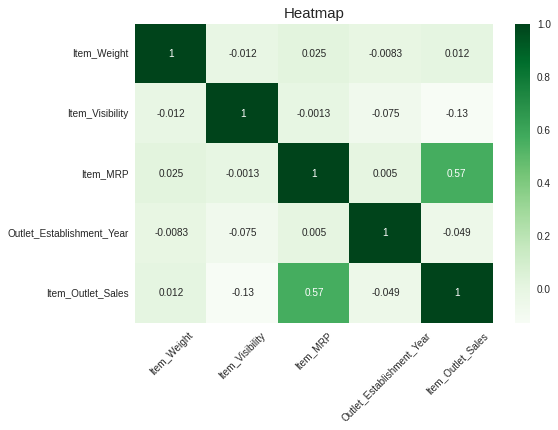

In [27]:
sns.heatmap(df.corr(), cmap = 'Greens',annot=True)
plt.xticks(rotation =45)
plt.title('Heatmap',fontsize = 15);

# **Part 4 Core**

In [72]:
df.head(10)

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.300000,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.920000,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.500000,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.200000,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,Large,Tier 3,Grocery Store,732.3800
4,NCD19,8.930000,Low Fat,0.000000,Household,53.8614,OUT013,1987,Large,Tier 3,Supermarket Type1,994.7052
5,FDP36,10.395000,Regular,0.000000,Baking Goods,51.4008,OUT018,2009,Medium,Tier 3,Supermarket Type2,556.6088
6,FDO10,13.650000,Regular,0.012741,Snack Foods,57.6588,OUT013,1987,Large,Tier 3,Supermarket Type1,343.5528
7,FDP10,12.857645,Low Fat,0.127470,Snack Foods,107.7622,OUT027,1985,Medium,Tier 3,Supermarket Type3,4022.7636
8,FDH17,16.200000,Regular,0.016687,Frozen Foods,96.9726,OUT045,2002,Small,Tier 2,Supermarket Type1,1076.5986
9,FDU28,19.200000,Regular,0.094450,Frozen Foods,187.8214,OUT017,2007,Small,Tier 2,Supermarket Type1,4710.5350


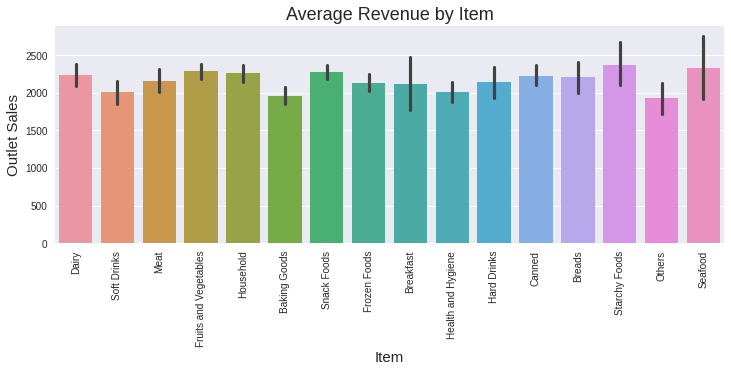

In [124]:
fig, ax = plt.subplots(ncols=1, figsize=(12,4))

ax = sns.barplot(data=df, x='Item_Type', y = 'Item_Outlet_Sales')

ax.tick_params(axis='x', rotation=90)
ax.set_xlabel('Item',fontsize = 15)
ax.set_ylabel('Outlet Sales',fontsize = 15)
ax.set_title('Average Revenue by Item',fontsize = 18);

Max_Sale = df.groupby('Item_Type')['Item_Outlet_Sales'].mean()

> The item with the highest average sales is Starchy Foods with an average Sale of $2,374.

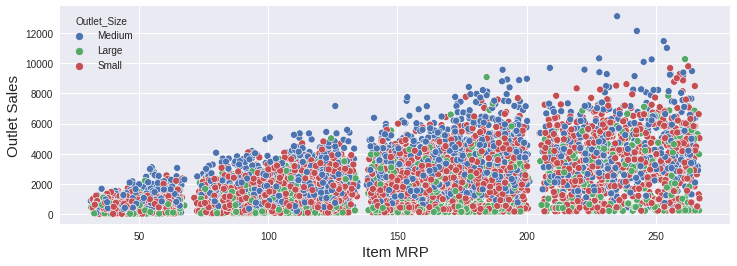

In [126]:
fig, ax = plt.subplots(ncols=1, figsize=(12,4))

ax = sns.scatterplot(data=df, x = 'Item_MRP',y = 'Item_Outlet_Sales', hue = 'Outlet_Size')
ax.set_xlabel('Item MRP',fontsize = 15)
ax.set_ylabel('Outlet Sales',fontsize = 15);

> A couple take aways can be made, the first being the items with higher MRP has higher Sales. Also, the medium sized outlet have higher sales for each item while the Large outlets have lower sales for the similar item prices.